# Iris Flower Classification

## Task Description

* The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

* Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

In [1]:
# Importing Libraries

import numpy as np  
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [3]:
# Load the dataset
iris = pd.read_csv("IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.shape

(150, 5)

In [6]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# Check duplicates
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [10]:
# Remove duplicates
iris.drop_duplicates(inplace=True)

In [11]:
iris.duplicated().sum()

0

In [12]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


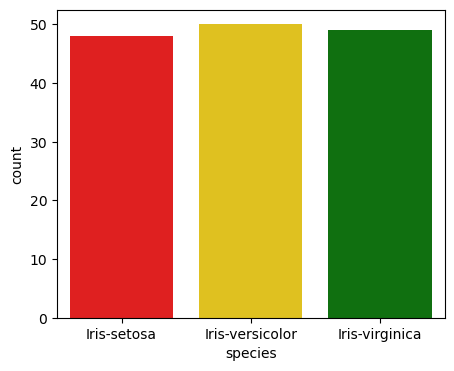

In [17]:
plt.figure(figsize=(5, 4))
sns.countplot(x="species", data=iris, palette={"Iris-setosa": "red", "Iris-versicolor": "gold", "Iris-virginica": "green"})
plt.show()


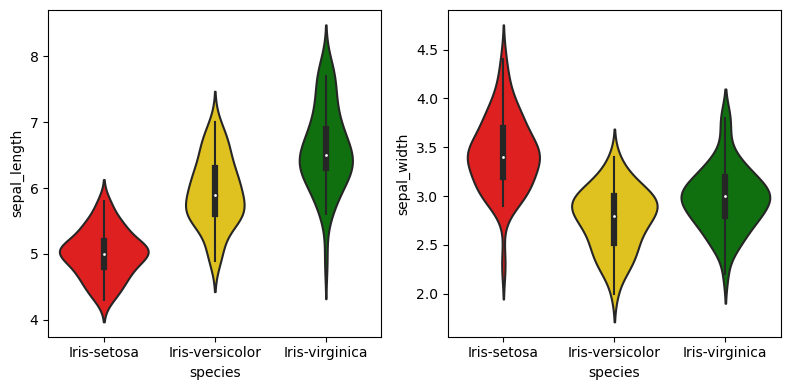

In [78]:
plt.figure(figsize=(16, 4))

plt.subplot(141)
sns.violinplot(x="species", y="sepal_length", data=iris, palette={"Iris-setosa": "red", "Iris-versicolor": "gold", "Iris-virginica": "green"})


plt.subplot(142)
sns.violinplot(x="species", y="sepal_width", data=iris, palette={"Iris-setosa": "red", "Iris-versicolor": "gold", "Iris-virginica": "green"})


plt.tight_layout()
plt.show()

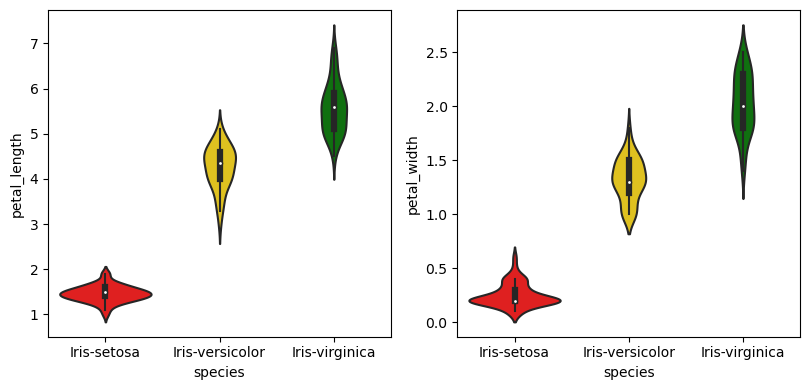

In [81]:
plt.figure(figsize=(16, 4))

plt.subplot(143)
sns.violinplot(x="species", y="petal_length", data=iris, palette={"Iris-setosa": "red", "Iris-versicolor": "gold", "Iris-virginica": "green"})


plt.subplot(144)
sns.violinplot(x="species", y="petal_width", data=iris, palette={"Iris-setosa": "red", "Iris-versicolor": "gold", "Iris-virginica": "green"})


plt.tight_layout()
plt.show()

In [40]:
#data modelling

x=iris.iloc[:,:4]
y=iris.iloc[:,4]

In [41]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [44]:
x_train.shape

(110, 4)

In [45]:
x_test.shape

(37, 4)

In [46]:
y_train.shape

(110,)

In [47]:
y_test.shape

(37,)

In [49]:
# Create the LogisticRegression model
LG=LogisticRegression()

LG.fit(x_train,y_train)

LogisticRegression()

In [50]:
# Create the Sport Vector Classifier
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [51]:
# Create the Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [58]:
y_pred = LG.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_dt = dt.predict(x_test)

In [59]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted_LR': y_pred, 'Predicted_SVM': y_pred_svm,'Predicted_DT': y_pred_dt})

print(results_df)

              Actual     Predicted_LR    Predicted_SVM     Predicted_DT
7        Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa
24       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa
27       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa
122   Iris-virginica   Iris-virginica   Iris-virginica   Iris-virginica
146   Iris-virginica   Iris-virginica   Iris-virginica   Iris-virginica
53   Iris-versicolor  Iris-versicolor  Iris-versicolor  Iris-versicolor
45       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa
22       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa
114   Iris-virginica   Iris-virginica   Iris-virginica   Iris-virginica
26       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa
42       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa
80   Iris-versicolor  Iris-versicolor  Iris-versicolor  Iris-versicolor
133   Iris-virginica   Iris-virginica   Iris-virginica   Iris-vi

In [67]:
# Model performance
def evaluate_model(model_name, y_true, y_pred):
    print(f"Model: {model_name}")
    
    # Confusion Matrix
    confusion = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confusion)
    
    # Classification Report
    report = classification_report(y_true, y_pred, target_names=iris['species'].unique())
    print("Classification Report:")
    print(report)
    
    # Accuracy Score
    accuracy = accuracy_score(y_true, y_pred) * 100
    print(f"Accuracy: {accuracy:.2f}%")
    print("-" * 40)
    
evaluate_model("**Logistic Regression**", y_test, y_pred)

Model: **Logistic Regression**
Confusion Matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        37
      macro avg       1.00      1.00      1.00        37
   weighted avg       1.00      1.00      1.00        37

Accuracy: 100.00%
----------------------------------------


In [68]:
evaluate_model("**Support Vector Machine**", y_test, y_pred_svm)

Model: **Support Vector Machine**
Confusion Matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        37
      macro avg       1.00      1.00      1.00        37
   weighted avg       1.00      1.00      1.00        37

Accuracy: 100.00%
----------------------------------------


In [69]:
evaluate_model("**Decision Tree**", y_test, y_pred_dt)

Model: **Decision Tree**
Confusion Matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        37
      macro avg       1.00      1.00      1.00        37
   weighted avg       1.00      1.00      1.00        37

Accuracy: 100.00%
----------------------------------------


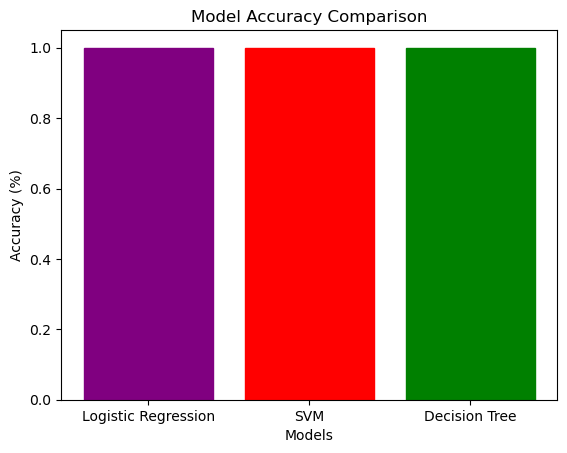

In [82]:
import matplotlib.pyplot as plt
accuracy_scores = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_dt)]

model_names = ["Logistic Regression", "SVM", "Decision Tree"]

colors = ['purple', 'red', 'green']

plt.figure()
bars = plt.bar(model_names, accuracy_scores)
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.show()
